<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/data%20visualitation/Data_Visualitation_A_Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.shape

(271116, 15)

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
df['Weight'].fillna(df['Weight'].mean(), inplace = True)
df['Height'].fillna(df['Height'].mean(), inplace = True)
df.dropna(subset = ['Medal'], axis = 0, inplace = True)

## Problem 1
Buat plot menggunakan teknik visualisasi yang tepat yang paling baik menyajikan pola global fitur tinggi dan berat badan pemenang medali 2016 dari lima cabang olahraga

Menentukan olahraga yang berhasil dimenangkan pada tahun 2016 dan mengurutkan berdasarkan total perolehan medali terbanyak yang bisa dilihat dari banyaknya data dari kolom ```ID```

In [ ]:
grouped_by_sport = df[(df['Year'] == 2016)].groupby('Sport')
sorted_sport = grouped_by_sport.count().sort_values(by = 'Medal', ascending = False).head().index

,ID,Age,Height,Weight,Year
Sport,,,,,
Athletics,12106349,5071.0,34055.67794,13590.107179,387072
Swimming,13464383,4437.0,35036.33897,14248.702393,385056
Rowing,9890723,4050.0,26781.00000,11768.000000,290304
Football,7121851,2553.0,18498.00000,7332.702393,213696
Hockey,7667209,2612.0,17392.00000,7009.000000,199584


Mengambil nama nama pemain yang berhasil mendapatkan medali di tahun 2016 pada olahraga yang telah ditentukan sebelumnya dan menghitung mean nya. Hal ini dilakukan untuk mendapatkan nilai aktual pada kolom ```Height``` dan ```Weight``` tiap pemain (data ```Height``` dan ```Weight``` pada pemain terlihat konsisten)

In [ ]:
player = df[(df['Year'] == 2016) & (df['Sport'].isin(sorted_sport))].groupby('Name').mean()
player

,ID,Age,Height,Weight,Year
Name,,,,,
Aaron Brown,15460,24.0,198.0,79.0,2016
Abbey Weitzeil,129476,19.0,178.0,68.0,2016
Abdullahi Shehu,109475,23.0,170.0,72.0,2016
Adam George Peaty,92529,21.0,191.0,86.0,2016
Adelina Maria Cojocariu-Bogus,22287,27.0,186.0,75.0,2016
...,...,...,...,...,...
Yuliya Andreyevna Yefimova,132765,24.0,178.0,64.0,2016
Zhang Wenxiu,134559,30.0,183.0,105.0,2016
Zoe Michaela de Toledo,26718,29.0,172.0,58.0,2016


Membuat grafik batang (bar chart) dengan mengambil sampel data 10 teratas pemain terurut berdasarkan abjad. Hal ini dilakukan karena banyaknya pemain dan perlu diambil beberapa agar visualisasi data terlihat baik

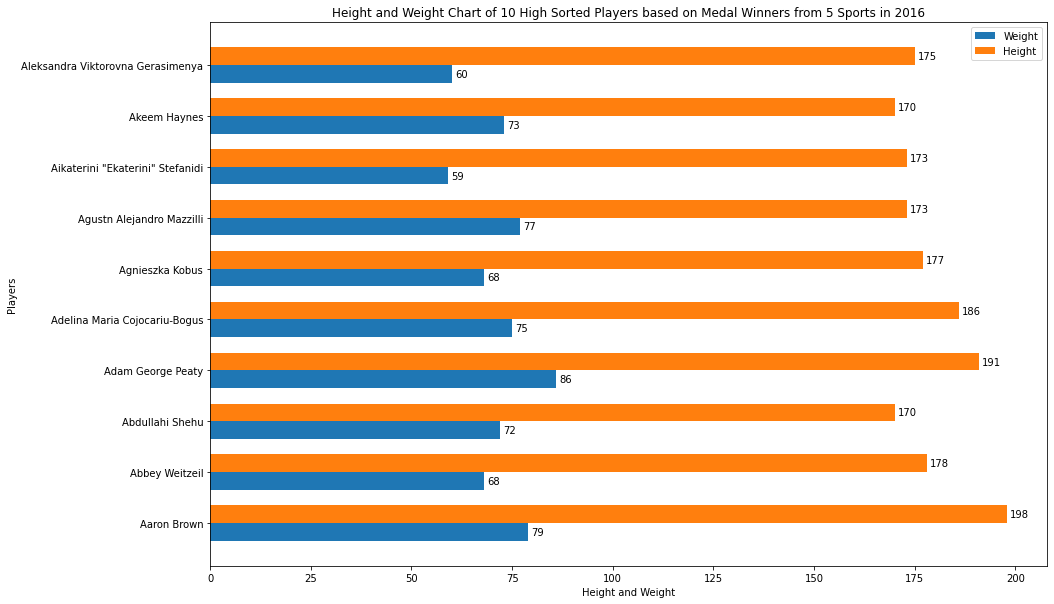

In [ ]:
label = player.head(10).index
weight = player['Weight'].head(10)
height = player['Height'].head(10)
width = 0.35
x = np.arange(len(label))

fig, ax = plt.subplots(figsize = (15, 10))
bar1 = ax.barh(x - width/2, weight, width, label = 'Weight')
bar2 = ax.barh(x + width/2, height, width, label = 'Height')

ax.set_xlabel('Height and Weight')
ax.set_ylabel('Players')
ax.set_title('Height and Weight Chart of 10 High Sorted Players based on Medal Winners from 5 Sports in 2016')
ax.set_yticks(x)
ax.set_yticklabels(label)
ax.legend()

ax.bar_label(bar1, padding = 3)
ax.bar_label(bar2, padding = 3)

plt.show()

## Problem 2
Buat plot menggunakan teknik visualisasi yang sesuai yang paling baik menyajikan statistik ringkasan untuk tinggi dan berat badan pemain yang memenangkan setiap jenis medali (emas/perak/perunggu) dalam data

Mencari nilai mean pada setiap perolehan medali 

In [ ]:
grouped_medal = df.groupby('Medal').mean()
grouped_medal

,ID,Age,Height,Weight,Year
Medal,,,,,
Bronze,69611.702971,25.879210,176.866630,72.838268,1975.189169
Gold,69358.276473,25.901013,177.356215,73.372088,1973.131618
Silver,69249.335011,25.996724,176.981749,72.940280,1973.509607


Membuat grafik batang (bar chart)

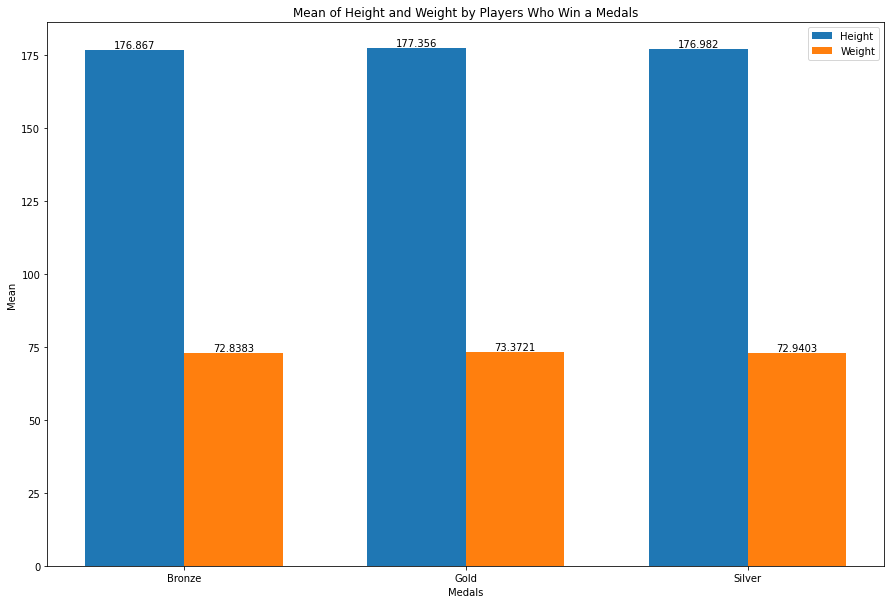

In [ ]:
label = grouped_medal.index
height = grouped_medal['Height']
weight = grouped_medal['Weight']
x = np.arange(len(label))
width = 0.35

fig, ax = plt.subplots(figsize = (15, 10))

bar1 = ax.bar(x - width/2, height, width, label = 'Height')
bar2 = ax.bar(x + width/2, weight, width, label = 'Weight')

ax.set_title('Mean of Height and Weight by Players Who Win a Medals')
ax.set_xlabel('Medals')
ax.set_ylabel('Mean')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

ax.bar_label(bar1)
ax.bar_label(bar2)

plt.show()